In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
import warnings
from sklearn.preprocessing import StandardScaler

 
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
df = pd.read_excel("etf_data_final.xlsx")
r_df = pd.read_excel("random_data_final.xlsx")

In [4]:
df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,0,0,0,0,0,0,0,1,0


In [5]:
r_df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
r_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [7]:
print(df.columns)
print(r_df.columns)

Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)
Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)


In [8]:
df_col = ['SPY', 'IWM', 'EEM', 'TLT', 'LQD', 'TIP', 'IYR',
       'GLD', 'FXE']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [9]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

SPY
Real Data Processing for horizon =  1
AUC good =  0.7833433399090832


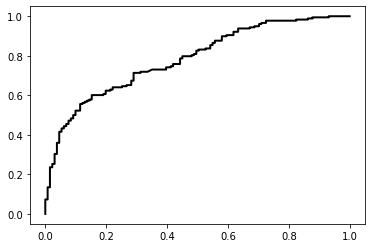

Random Data Processing for horizon =  1
Random data AUC =  0.5016296423363925


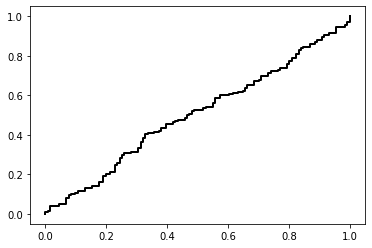

C =  0.1
Real_data_accuracy   :  0.6019
Random data_accuracy :  0.5761
Gain =  0.0258
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8905847901322211


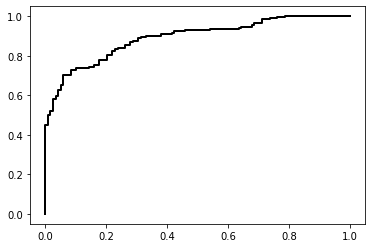

Random Data Processing for horizon =  3
Random data AUC =  0.600053243411128


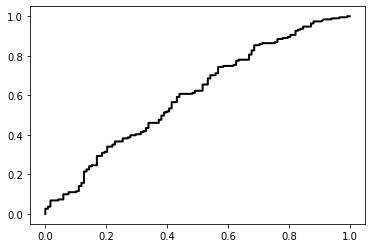

C =  0.1
Real_data_accuracy   :  0.7217
Random data_accuracy :  0.6181
Gain =  0.1036
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9257911808538618


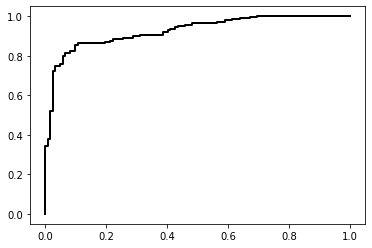

Random Data Processing for horizon =  5
Random data AUC =  0.6653370737266591


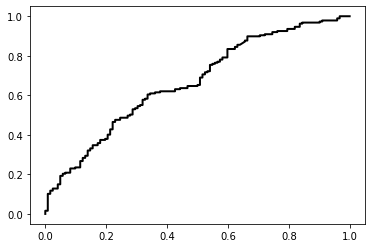

C =  0.1
Real_data_accuracy   :  0.7379
Random data_accuracy :  0.6052
Gain =  0.1327
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9108049311094997


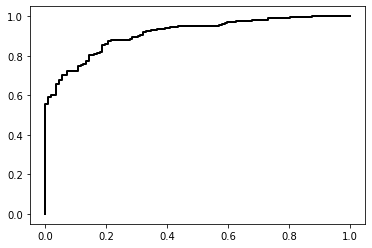

Random Data Processing for horizon =  10
Random data AUC =  0.752492748368383


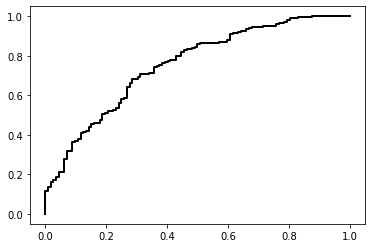

C =  0.1
Real_data_accuracy   :  0.7864
Random data_accuracy :  0.6634
Gain =  0.123
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9467474784861665


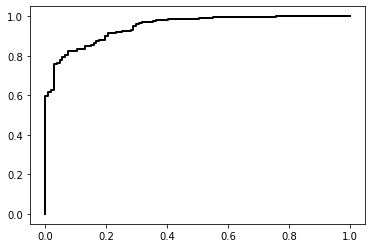

Random Data Processing for horizon =  20
Random data AUC =  0.818682335523272


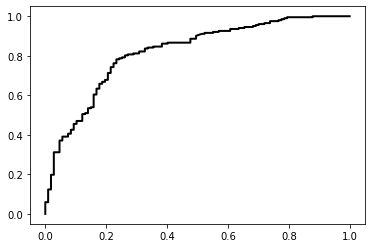

C =  0.1
Real_data_accuracy   :  0.7346
Random data_accuracy :  0.6667
Gain =  0.0679
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9682971014492754


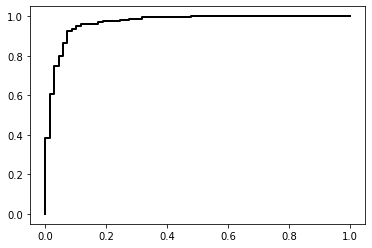

Random Data Processing for horizon =  40
Random data AUC =  0.8782608695652174


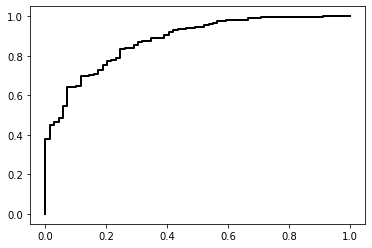

C =  0.1
Real_data_accuracy   :  0.8123
Random data_accuracy :  0.7767
Gain =  0.0356
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9901085313916747


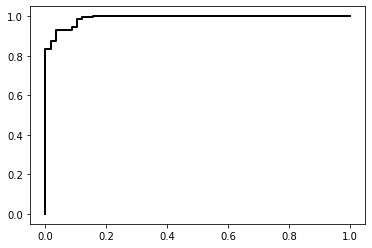

Random Data Processing for horizon =  60
Random data AUC =  0.8514218986124467


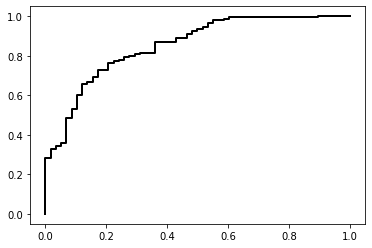

C =  0.1
Real_data_accuracy   :  0.8155
Random data_accuracy :  0.8123
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9952617328519855


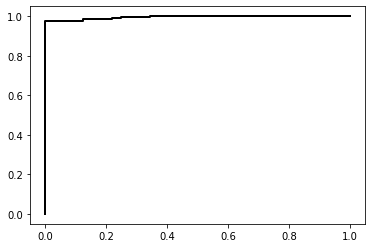

Random Data Processing for horizon =  120
Random data AUC =  0.975293321299639


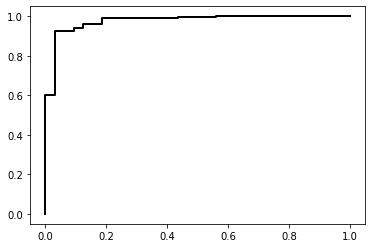

C =  0.1
Real_data_accuracy   :  0.8964
Random data_accuracy :  0.8964
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9903846153846154


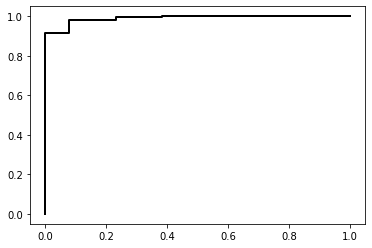

Random Data Processing for horizon =  250
Random data AUC =  0.9719334719334718


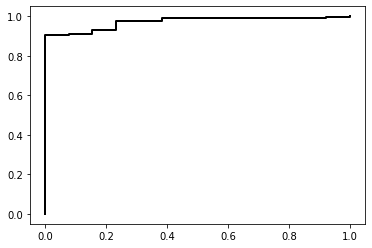

C =  0.1
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9579
Gain =  -0.0
---------------------------------------------

IWM
Real Data Processing for horizon =  1
AUC good =  0.7482338099243062


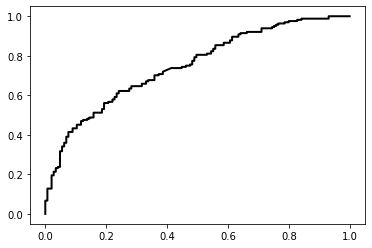

Random Data Processing for horizon =  1
Random data AUC =  0.5521867115222876


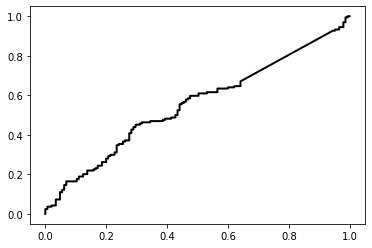

C =  0.1
Real_data_accuracy   :  0.5437
Random data_accuracy :  0.5307
Gain =  0.013
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8732271018455229


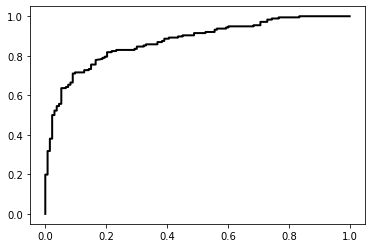

Random Data Processing for horizon =  3
Random data AUC =  0.40204203691045803


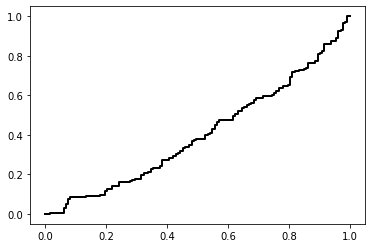

C =  0.1
Real_data_accuracy   :  0.7087
Random data_accuracy :  0.5696
Gain =  0.1391
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.90578849091835


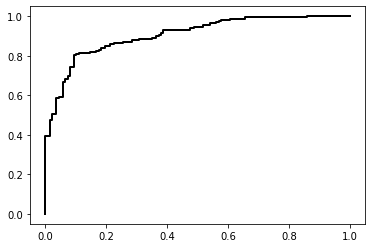

Random Data Processing for horizon =  5
Random data AUC =  0.6708114072313698


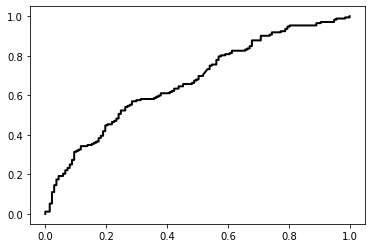

C =  0.1
Real_data_accuracy   :  0.7314
Random data_accuracy :  0.5566
Gain =  0.1748
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8962336013542108


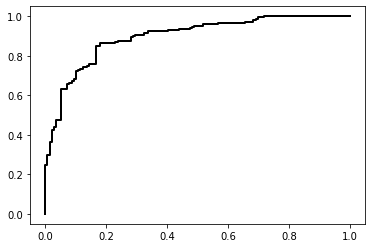

Random Data Processing for horizon =  10
Random data AUC =  0.680321625052899


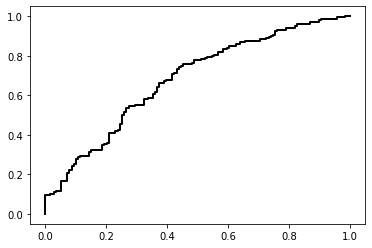

C =  0.1
Real_data_accuracy   :  0.7508
Random data_accuracy :  0.5922
Gain =  0.1586
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9316913687881431


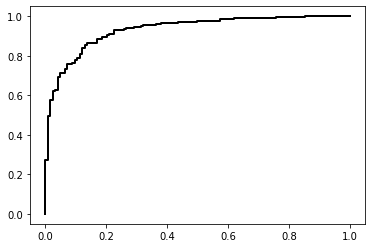

Random Data Processing for horizon =  20
Random data AUC =  0.7225370531822145


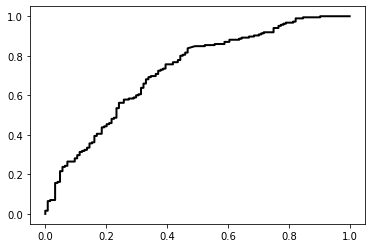

C =  0.1
Real_data_accuracy   :  0.7864
Random data_accuracy :  0.6375
Gain =  0.1489
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9488749502190362


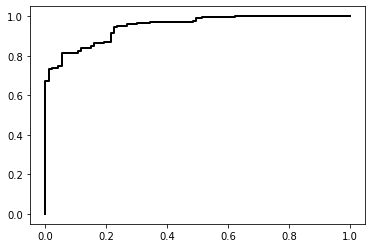

Random Data Processing for horizon =  40
Random data AUC =  0.7839008363201911


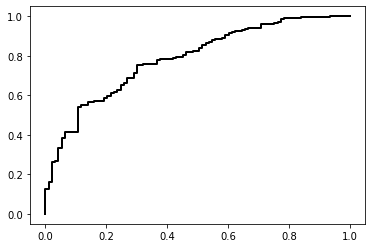

C =  0.1
Real_data_accuracy   :  0.7864
Random data_accuracy :  0.699
Gain =  0.0874
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9585243629384795


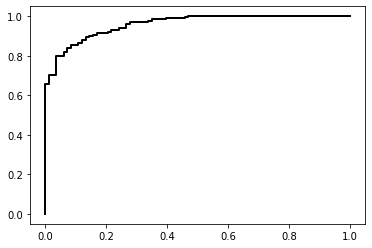

Random Data Processing for horizon =  60
Random data AUC =  0.7980594946156306


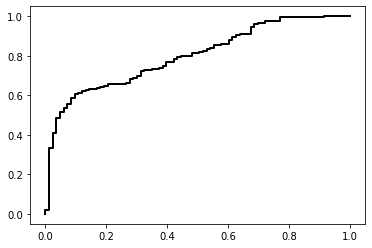

C =  0.1
Real_data_accuracy   :  0.8058
Random data_accuracy :  0.7314
Gain =  0.0744
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9566297718545291


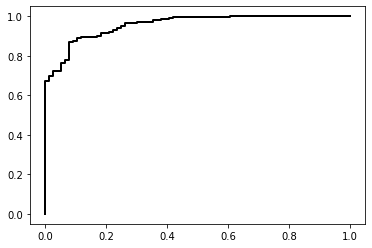

Random Data Processing for horizon =  120
Random data AUC =  0.8007115428055116


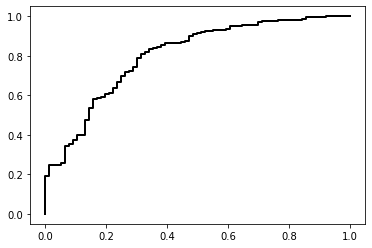

C =  0.1
Real_data_accuracy   :  0.7929
Random data_accuracy :  0.754
Gain =  0.0389
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9856600189933523


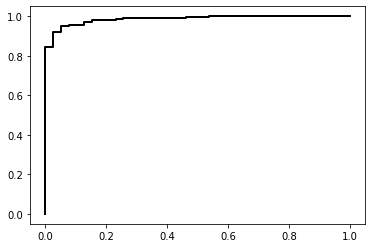

Random Data Processing for horizon =  250
Random data AUC =  0.9003798670465337


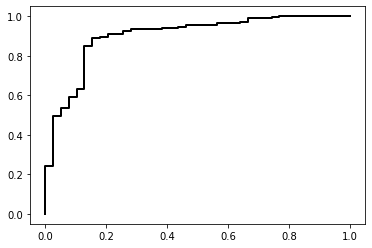

C =  0.1
Real_data_accuracy   :  0.8997
Random data_accuracy :  0.8738
Gain =  0.0259
---------------------------------------------

EEM
Real Data Processing for horizon =  1
AUC good =  0.7538756424298594


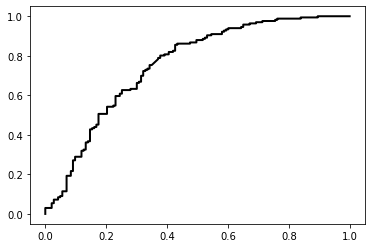

Random Data Processing for horizon =  1
Random data AUC =  0.5614205072036398


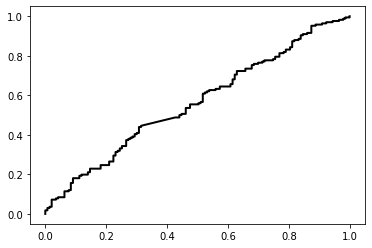

C =  0.1
Real_data_accuracy   :  0.4693
Random data_accuracy :  0.4628
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8127053669222344


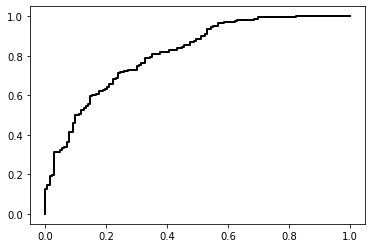

Random Data Processing for horizon =  3
Random data AUC =  0.5883183081978264


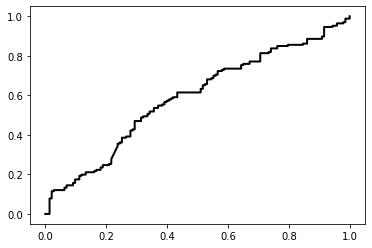

C =  0.1
Real_data_accuracy   :  0.712
Random data_accuracy :  0.4628
Gain =  0.2492
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8610528963031269


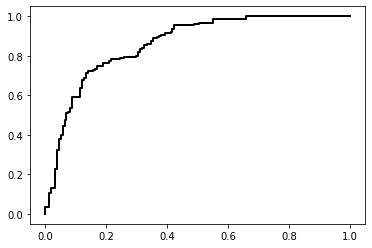

Random Data Processing for horizon =  5
Random data AUC =  0.5933439517143096


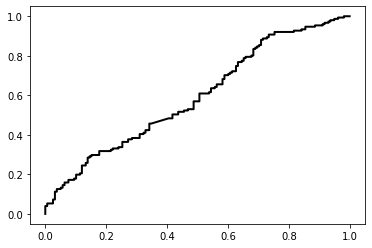

C =  0.1
Real_data_accuracy   :  0.7605
Random data_accuracy :  0.4887
Gain =  0.2718
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8856777600804762


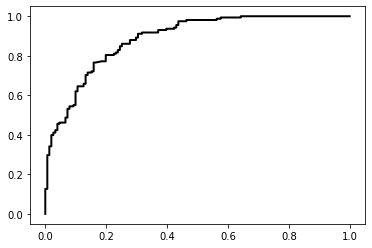

Random Data Processing for horizon =  10
Random data AUC =  0.6692094894794198


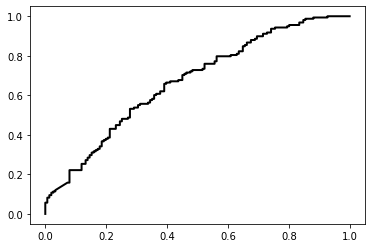

C =  0.1
Real_data_accuracy   :  0.7896
Random data_accuracy :  0.5049
Gain =  0.2847
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9169061707523246


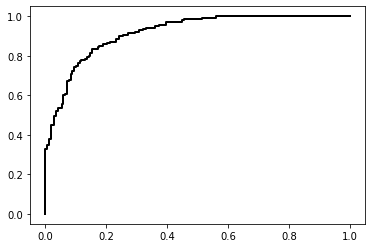

Random Data Processing for horizon =  20
Random data AUC =  0.6727810650887575


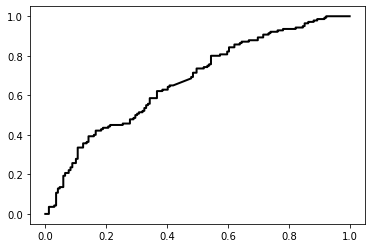

C =  0.1
Real_data_accuracy   :  0.8155
Random data_accuracy :  0.6019
Gain =  0.2136
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9429989944695827


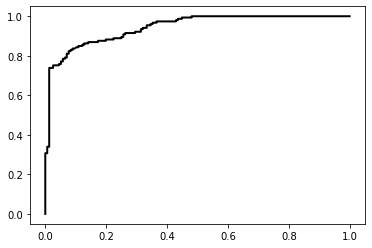

Random Data Processing for horizon =  40
Random data AUC =  0.7370537958773253


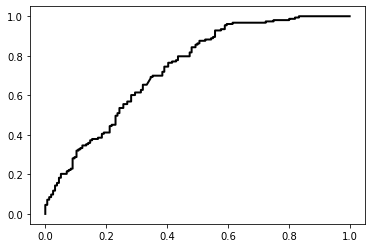

C =  0.1
Real_data_accuracy   :  0.8706
Random data_accuracy :  0.6764
Gain =  0.1942
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9746480053637278


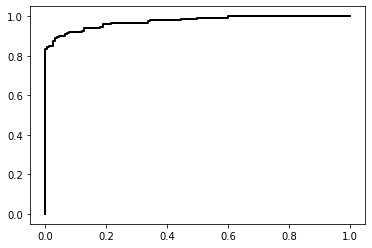

Random Data Processing for horizon =  60
Random data AUC =  0.7830623533355683


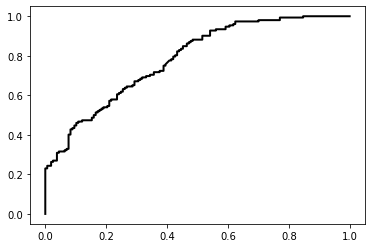

C =  0.1
Real_data_accuracy   :  0.9029
Random data_accuracy :  0.6796
Gain =  0.2233
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9574744427685604


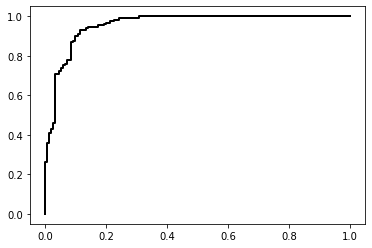

Random Data Processing for horizon =  120
Random data AUC =  0.755446623093682


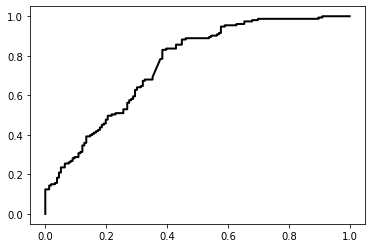

C =  0.1
Real_data_accuracy   :  0.8932
Random data_accuracy :  0.699
Gain =  0.1942
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.963208179684881


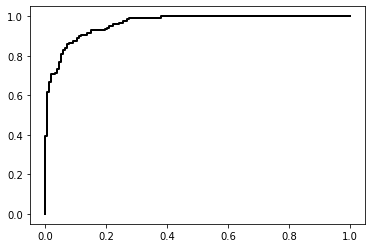

Random Data Processing for horizon =  250
Random data AUC =  0.6911037546094536


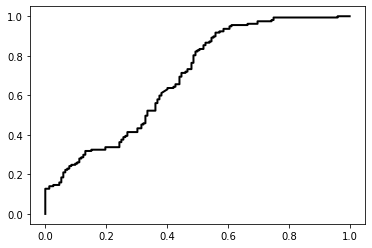

C =  0.1
Real_data_accuracy   :  0.8673
Random data_accuracy :  0.6278
Gain =  0.2395
---------------------------------------------

TLT
Real Data Processing for horizon =  1
AUC good =  0.8504823825503356


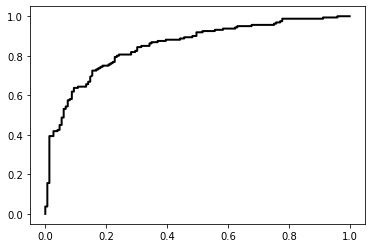

Random Data Processing for horizon =  1
Random data AUC =  0.5366191275167785


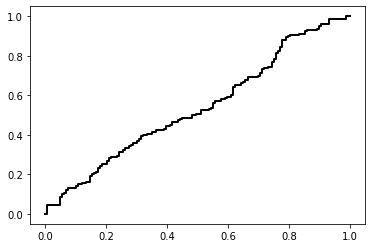

C =  0.1
Real_data_accuracy   :  0.5178
Random data_accuracy :  0.5178
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.9024262487428765


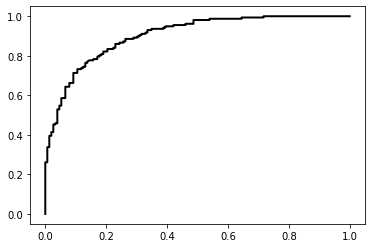

Random Data Processing for horizon =  3
Random data AUC =  0.5445021790144151


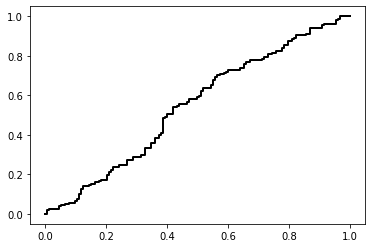

C =  0.1
Real_data_accuracy   :  0.7379
Random data_accuracy :  0.5081
Gain =  0.2298
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8885956091838445


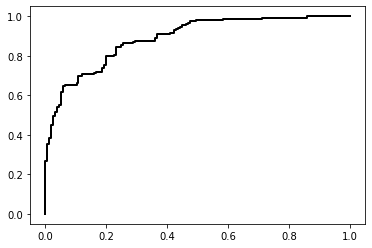

Random Data Processing for horizon =  5
Random data AUC =  0.542755991285403


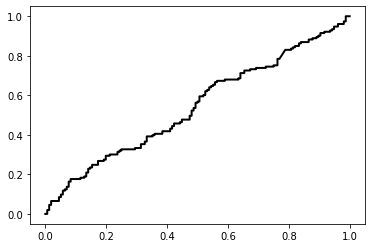

C =  0.1
Real_data_accuracy   :  0.7476
Random data_accuracy :  0.4951
Gain =  0.2525
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8762164429530201


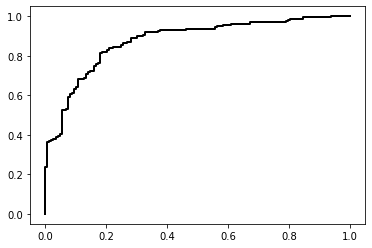

Random Data Processing for horizon =  10
Random data AUC =  0.6493078859060403


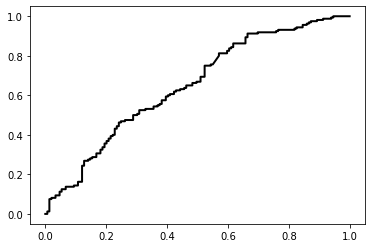

C =  0.1
Real_data_accuracy   :  0.7961
Random data_accuracy :  0.5178
Gain =  0.2783
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9630289065772937


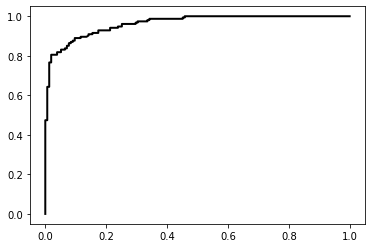

Random Data Processing for horizon =  20
Random data AUC =  0.7408881441139505


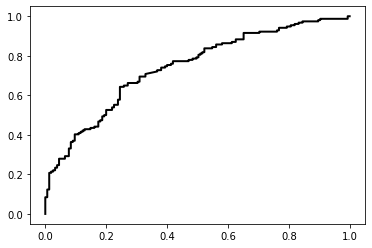

C =  0.1
Real_data_accuracy   :  0.8576
Random data_accuracy :  0.4984
Gain =  0.3592
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9559270516717325


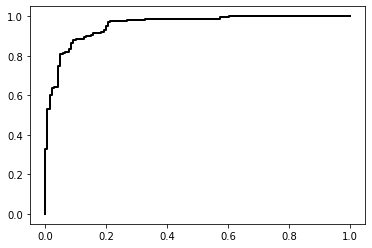

Random Data Processing for horizon =  40
Random data AUC =  0.8164893617021276


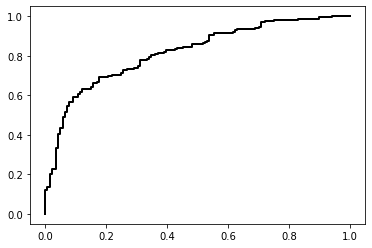

C =  0.1
Real_data_accuracy   :  0.8835
Random data_accuracy :  0.5437
Gain =  0.3398
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9700393768190378


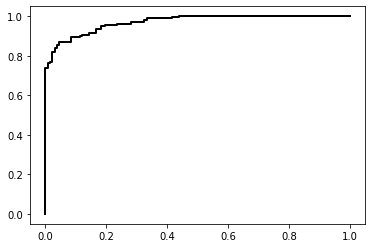

Random Data Processing for horizon =  60
Random data AUC =  0.8453603834959768


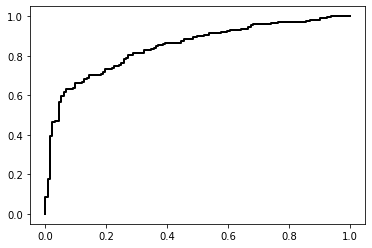

C =  0.1
Real_data_accuracy   :  0.89
Random data_accuracy :  0.5728
Gain =  0.3172
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9858761987794247


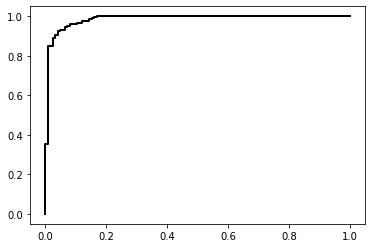

Random Data Processing for horizon =  120
Random data AUC =  0.8495422842197035


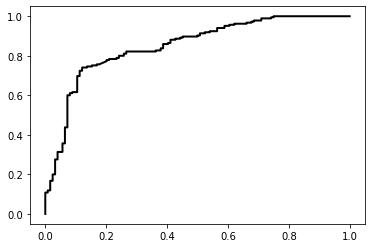

C =  0.1
Real_data_accuracy   :  0.9256
Random data_accuracy :  0.5987
Gain =  0.3269
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.994718309859155


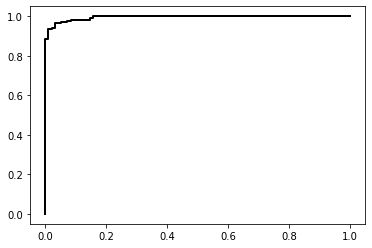

Random Data Processing for horizon =  250
Random data AUC =  0.9283059467918623


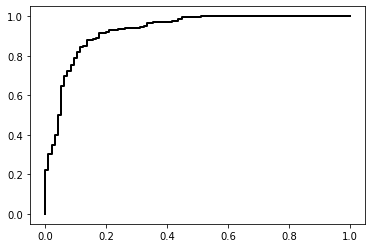

C =  0.1
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.6893
Gain =  0.2492
---------------------------------------------

LQD
Real Data Processing for horizon =  1
AUC good =  0.8321488645920941


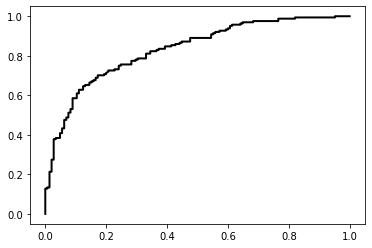

Random Data Processing for horizon =  1
Random data AUC =  0.48465096719932715


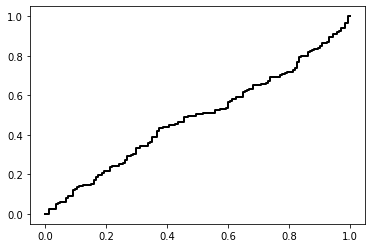

C =  0.1
Real_data_accuracy   :  0.5307
Random data_accuracy :  0.5307
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8557919621749409


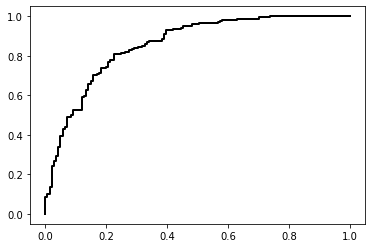

Random Data Processing for horizon =  3
Random data AUC =  0.5659616683552854


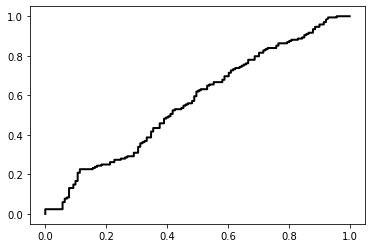

C =  0.1
Real_data_accuracy   :  0.6505
Random data_accuracy :  0.5437
Gain =  0.1068
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9008031442241968


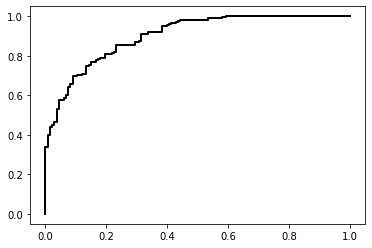

Random Data Processing for horizon =  5
Random data AUC =  0.6326255980861245


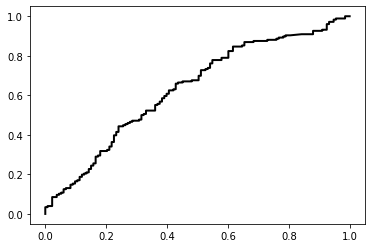

C =  0.1
Real_data_accuracy   :  0.7411
Random data_accuracy :  0.5696
Gain =  0.1715
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8906936873571303


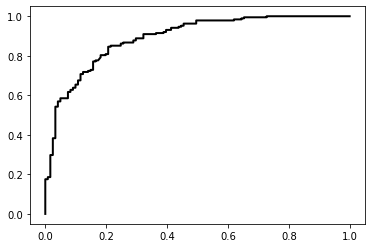

Random Data Processing for horizon =  10
Random data AUC =  0.7451204501494637


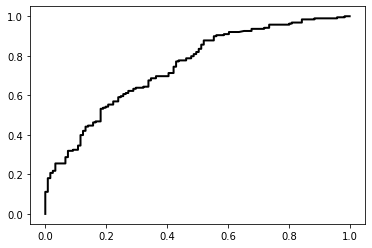

C =  0.1
Real_data_accuracy   :  0.7929
Random data_accuracy :  0.6084
Gain =  0.1845
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9377222655911182


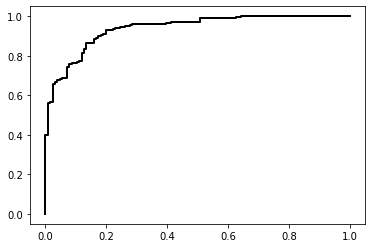

Random Data Processing for horizon =  20
Random data AUC =  0.7521033914476538


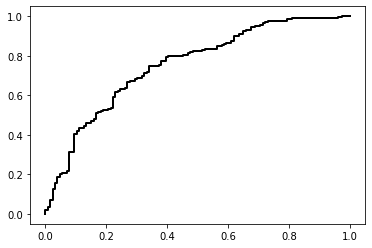

C =  0.1
Real_data_accuracy   :  0.7346
Random data_accuracy :  0.5922
Gain =  0.1424
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9614614614614615


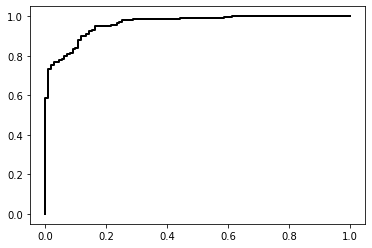

Random Data Processing for horizon =  40
Random data AUC =  0.8197060697060697


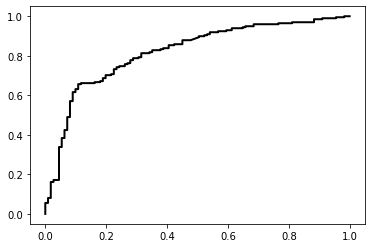

C =  0.1
Real_data_accuracy   :  0.7573
Random data_accuracy :  0.6408
Gain =  0.1165
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9820954254795868


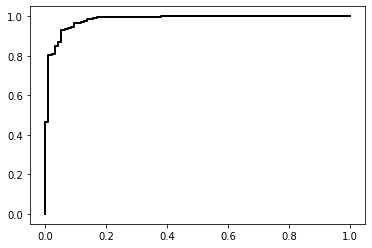

Random Data Processing for horizon =  60
Random data AUC =  0.8612395474667979


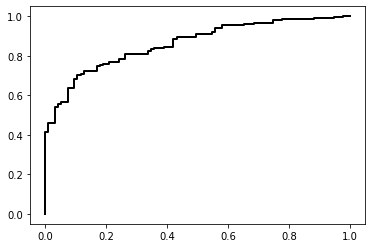

C =  0.1
Real_data_accuracy   :  0.8155
Random data_accuracy :  0.6926
Gain =  0.1229
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9574049803407602


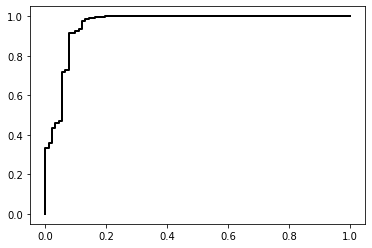

Random Data Processing for horizon =  120
Random data AUC =  0.8987045065026716


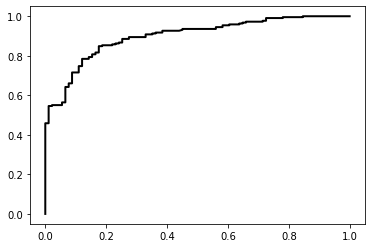

C =  0.1
Real_data_accuracy   :  0.8932
Random data_accuracy :  0.7055
Gain =  0.1877
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9906887755102041


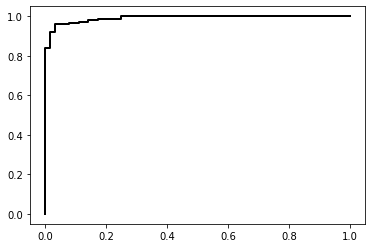

Random Data Processing for horizon =  250
Random data AUC =  0.9284438775510204


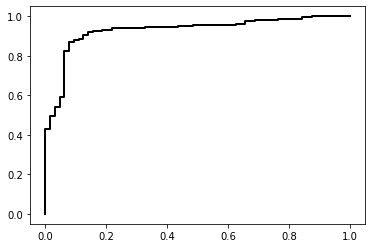

C =  0.1
Real_data_accuracy   :  0.9223
Random data_accuracy :  0.7929
Gain =  0.1294
---------------------------------------------

TIP
Real Data Processing for horizon =  1
AUC good =  0.7844394167923581


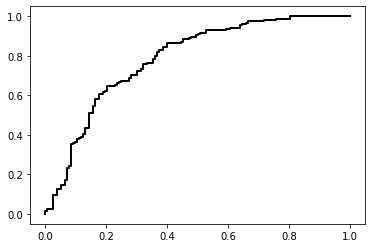

Random Data Processing for horizon =  1
Random data AUC =  0.5673286408580527


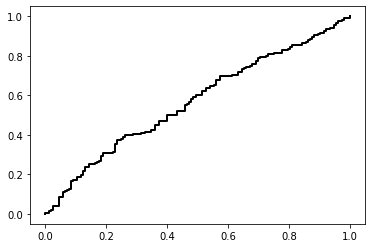

C =  0.1
Real_data_accuracy   :  0.5696
Random data_accuracy :  0.5049
Gain =  0.0647
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8115626309174696


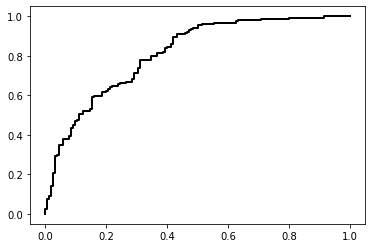

Random Data Processing for horizon =  3
Random data AUC =  0.5226644323418517


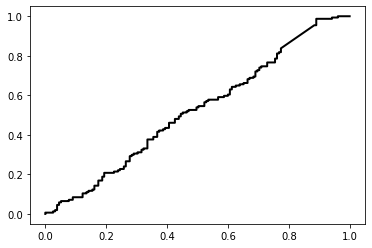

C =  0.1
Real_data_accuracy   :  0.7152
Random data_accuracy :  0.4984
Gain =  0.2168
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8929349648005364


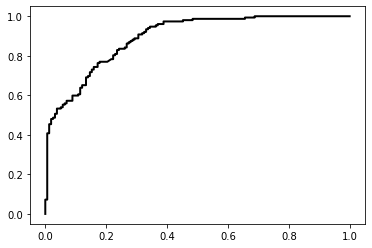

Random Data Processing for horizon =  5
Random data AUC =  0.6188400938652363


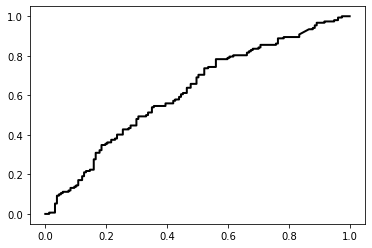

C =  0.1
Real_data_accuracy   :  0.7994
Random data_accuracy :  0.4919
Gain =  0.3075
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8789173789173789


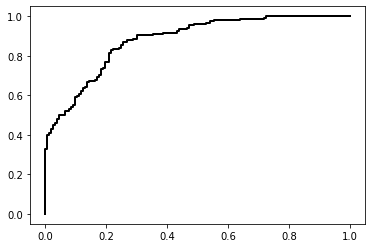

Random Data Processing for horizon =  10
Random data AUC =  0.5564353946706888


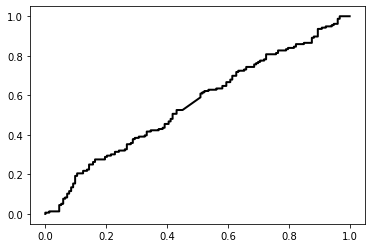

C =  0.1
Real_data_accuracy   :  0.8058
Random data_accuracy :  0.5049
Gain =  0.3009
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9038800705467372


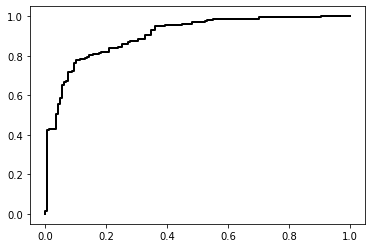

Random Data Processing for horizon =  20
Random data AUC =  0.7021709918535315


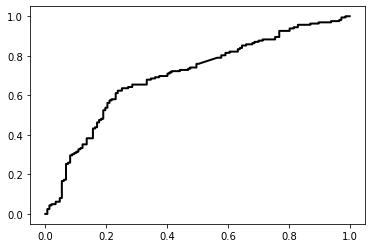

C =  0.1
Real_data_accuracy   :  0.8058
Random data_accuracy :  0.5243
Gain =  0.2815
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.8889402859545835


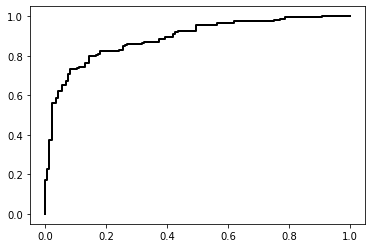

Random Data Processing for horizon =  40
Random data AUC =  0.7219722455845248


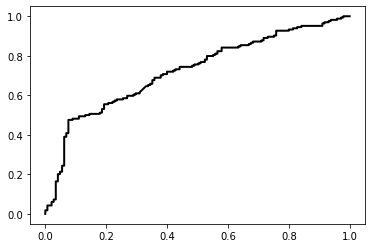

C =  0.1
Real_data_accuracy   :  0.8155
Random data_accuracy :  0.5307
Gain =  0.2848
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9447014297729184


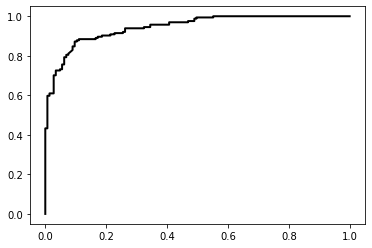

Random Data Processing for horizon =  60
Random data AUC =  0.760071488645921


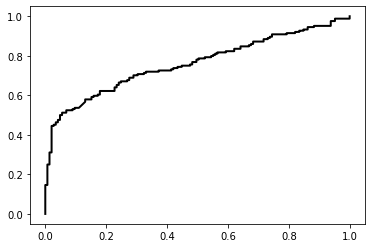

C =  0.1
Real_data_accuracy   :  0.8641
Random data_accuracy :  0.5437
Gain =  0.3204
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9677188552188554


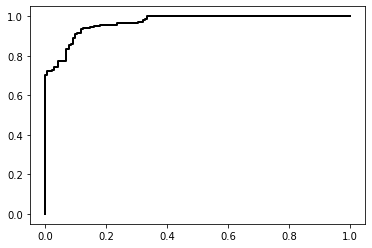

Random Data Processing for horizon =  120
Random data AUC =  0.8348905723905723


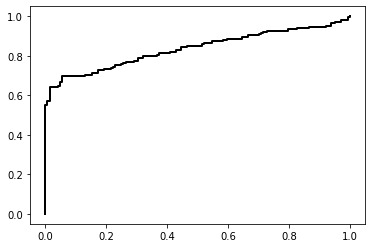

C =  0.1
Real_data_accuracy   :  0.9029
Random data_accuracy :  0.6246
Gain =  0.2783
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9980842911877394


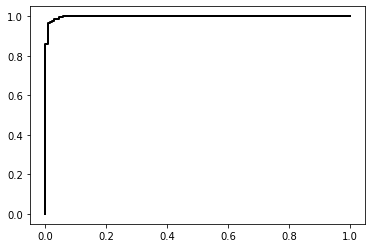

Random Data Processing for horizon =  250
Random data AUC =  0.9206683695189442


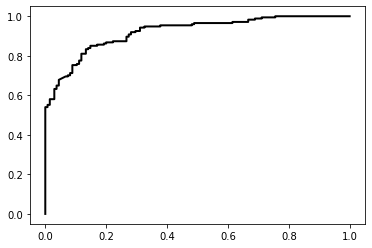

C =  0.1
Real_data_accuracy   :  0.9773
Random data_accuracy :  0.699
Gain =  0.2783
---------------------------------------------

IYR
Real Data Processing for horizon =  1
AUC good =  0.6519212625439574


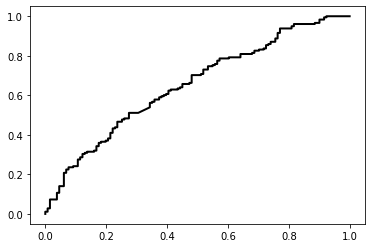

Random Data Processing for horizon =  1
Random data AUC =  0.5491894673642679


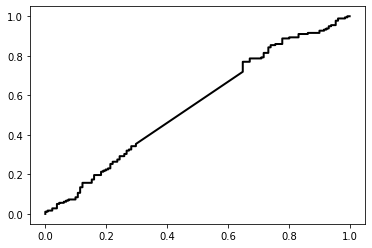

C =  0.1
Real_data_accuracy   :  0.6278
Random data_accuracy :  0.5696
Gain =  0.0582
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8627022583715497


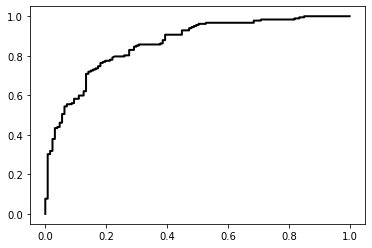

Random Data Processing for horizon =  3
Random data AUC =  0.5507484641342909


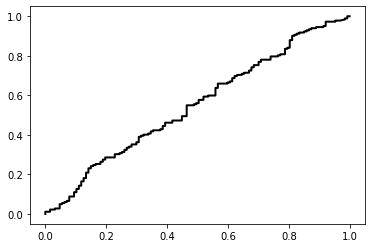

C =  0.1
Real_data_accuracy   :  0.6019
Random data_accuracy :  0.589
Gain =  0.0129
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8798681585566832


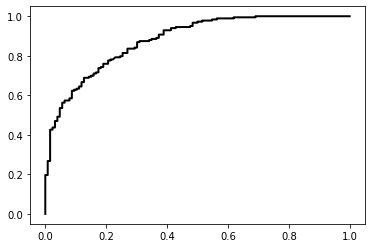

Random Data Processing for horizon =  5
Random data AUC =  0.6105906843611761


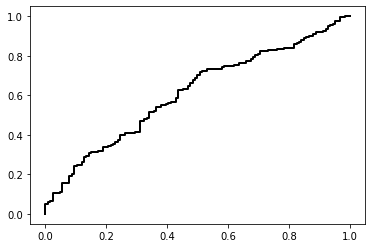

C =  0.1
Real_data_accuracy   :  0.6796
Random data_accuracy :  0.5922
Gain =  0.0874
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8952150211992732


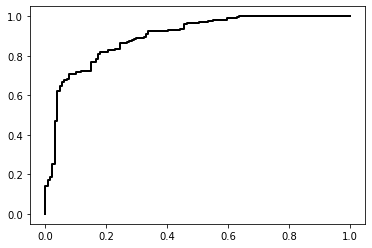

Random Data Processing for horizon =  10
Random data AUC =  0.6302673704248508


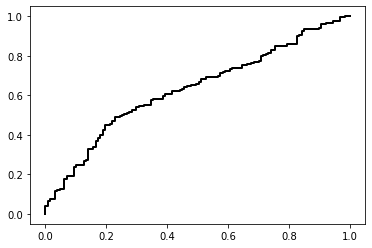

C =  0.1
Real_data_accuracy   :  0.7087
Random data_accuracy :  0.589
Gain =  0.1197
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.946848500743072


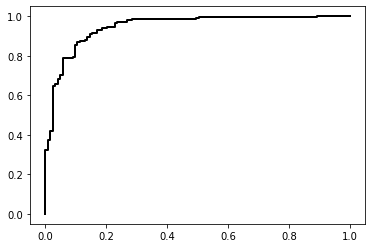

Random Data Processing for horizon =  20
Random data AUC =  0.6726112422414547


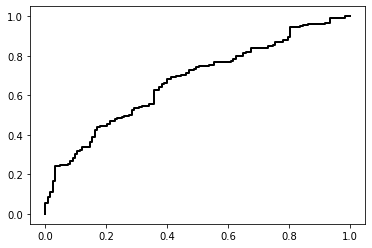

C =  0.1
Real_data_accuracy   :  0.6602
Random data_accuracy :  0.6019
Gain =  0.0583
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9626416739319965


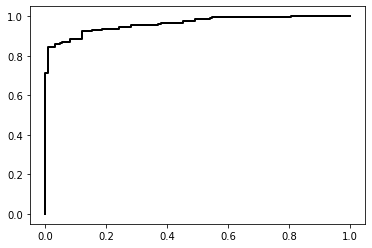

Random Data Processing for horizon =  40
Random data AUC =  0.7636006974716651


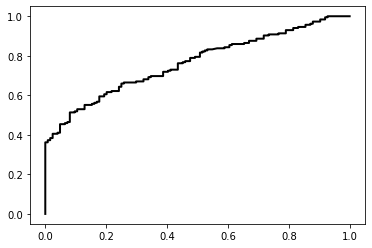

C =  0.1
Real_data_accuracy   :  0.8673
Random data_accuracy :  0.5987
Gain =  0.2686
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9713450292397661


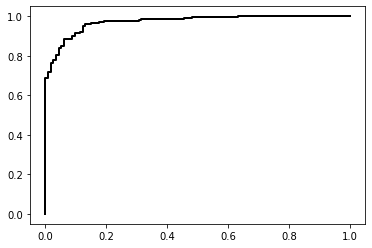

Random Data Processing for horizon =  60
Random data AUC =  0.8232568600989654


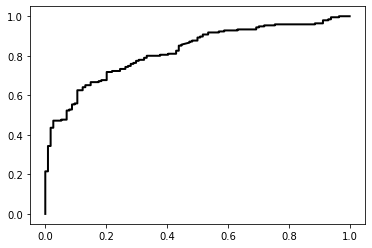

C =  0.1
Real_data_accuracy   :  0.7929
Random data_accuracy :  0.6311
Gain =  0.1618
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9954831932773109


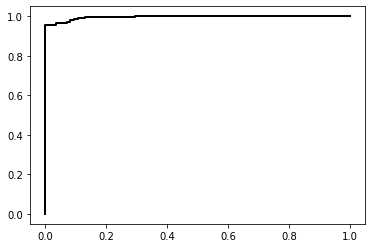

Random Data Processing for horizon =  120
Random data AUC =  0.9483193277310924


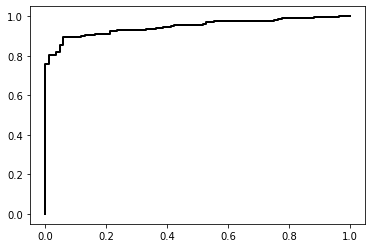

C =  0.1
Real_data_accuracy   :  0.8964
Random data_accuracy :  0.7249
Gain =  0.1715
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9875912408759124


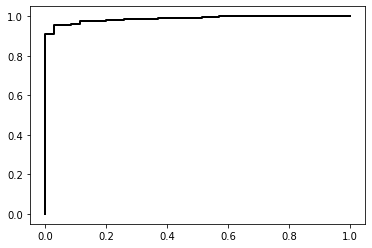

Random Data Processing for horizon =  250
Random data AUC =  0.9321167883211678


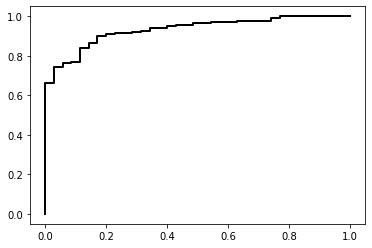

C =  0.1
Real_data_accuracy   :  0.8867
Random data_accuracy :  0.8867
Gain =  -0.0
---------------------------------------------

GLD
Real Data Processing for horizon =  1
AUC good =  0.6285534591194968


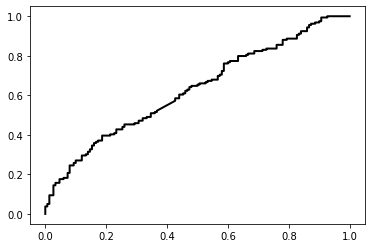

Random Data Processing for horizon =  1
Random data AUC =  0.4807127882599581


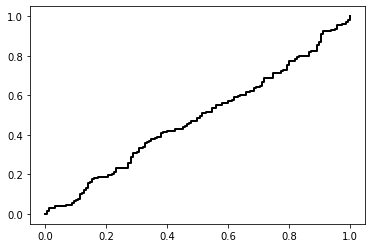

C =  0.1
Real_data_accuracy   :  0.4854
Random data_accuracy :  0.4854
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.7400033531729399


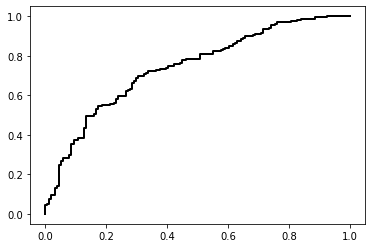

Random Data Processing for horizon =  3
Random data AUC =  0.5314988683041328


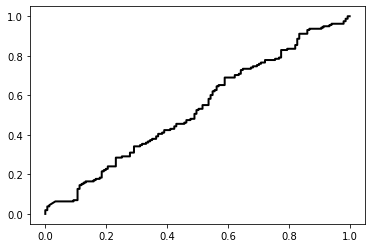

C =  0.1
Real_data_accuracy   :  0.5113
Random data_accuracy :  0.4887
Gain =  0.0226
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8331377807576266


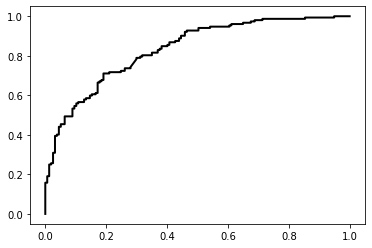

Random Data Processing for horizon =  5
Random data AUC =  0.5405003352329869


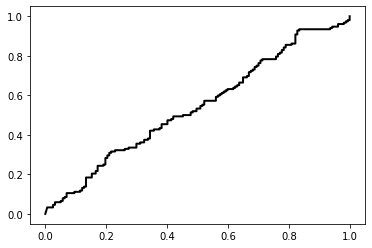

C =  0.1
Real_data_accuracy   :  0.7282
Random data_accuracy :  0.5081
Gain =  0.2201
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8626355155895453


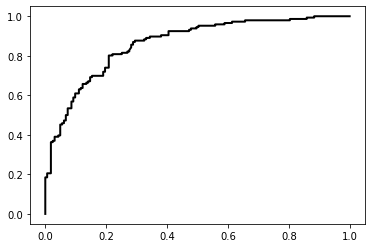

Random Data Processing for horizon =  10
Random data AUC =  0.5666442558198168


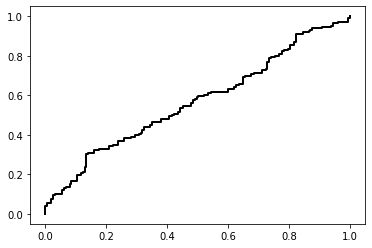

C =  0.1
Real_data_accuracy   :  0.712
Random data_accuracy :  0.5275
Gain =  0.1845
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9009202971968929


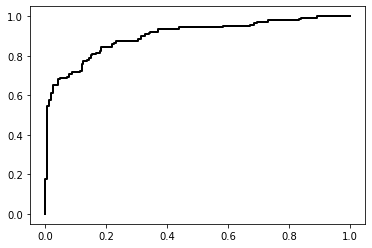

Random Data Processing for horizon =  20
Random data AUC =  0.652693346842283


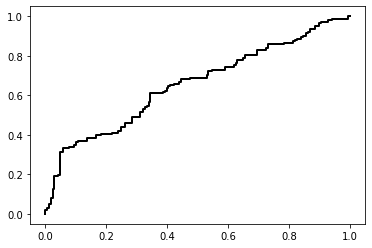

C =  0.1
Real_data_accuracy   :  0.5599
Random data_accuracy :  0.5437
Gain =  0.0162
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9577984877791454


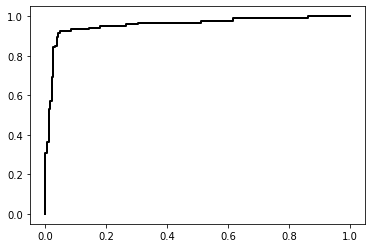

Random Data Processing for horizon =  40
Random data AUC =  0.8459205204853174


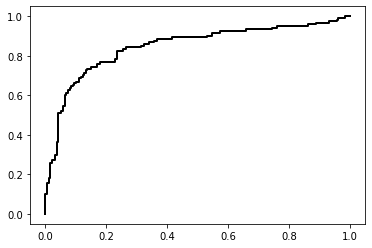

C =  0.1
Real_data_accuracy   :  0.6117
Random data_accuracy :  0.6084
Gain =  0.0033
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9558467936937809


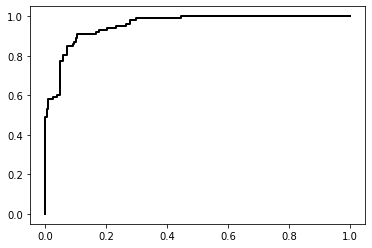

Random Data Processing for horizon =  60
Random data AUC =  0.8216703743108618


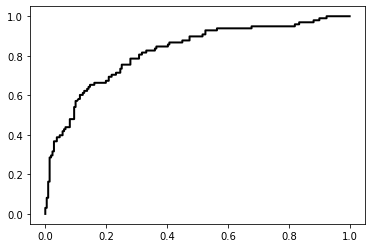

C =  0.1
Real_data_accuracy   :  0.7638
Random data_accuracy :  0.6828
Gain =  0.081
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9596359522830111


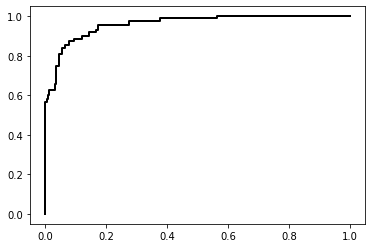

Random Data Processing for horizon =  120
Random data AUC =  0.8525812422871246


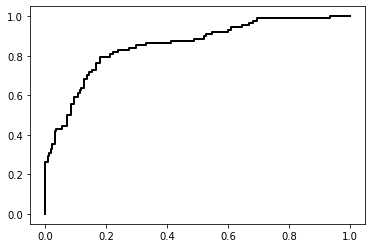

C =  0.1
Real_data_accuracy   :  0.7605
Random data_accuracy :  0.7152
Gain =  0.0453
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9553472307882077


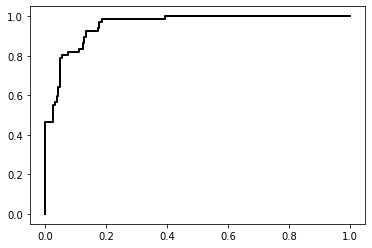

Random Data Processing for horizon =  250
Random data AUC =  0.8292216602935735


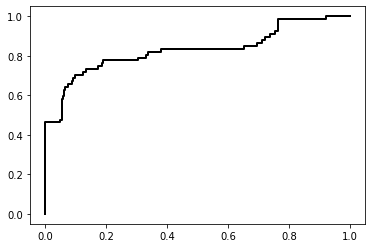

C =  0.1
Real_data_accuracy   :  0.8835
Random data_accuracy :  0.8673
Gain =  0.0162
---------------------------------------------

FXE
Real Data Processing for horizon =  1
AUC good =  0.6672979797979798


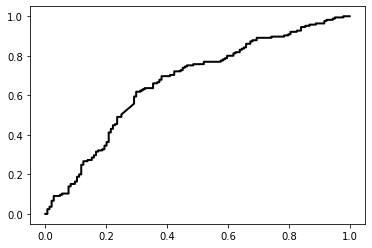

Random Data Processing for horizon =  1
Random data AUC =  0.4543771043771043


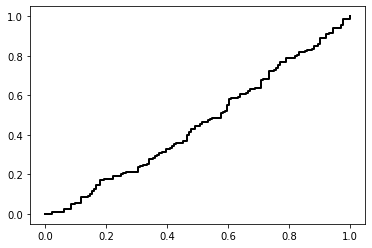

C =  0.1
Real_data_accuracy   :  0.466
Random data_accuracy :  0.466
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.7894085570469799


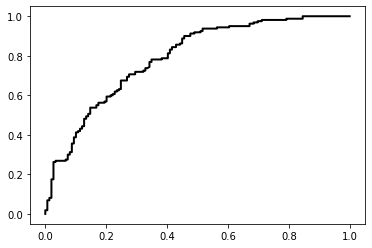

Random Data Processing for horizon =  3
Random data AUC =  0.5703439597315436


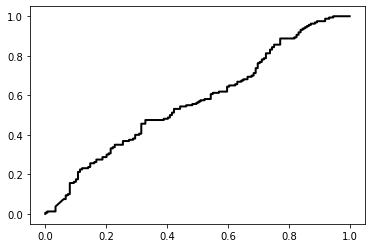

C =  0.1
Real_data_accuracy   :  0.4984
Random data_accuracy :  0.4822
Gain =  0.0162
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8570469798657718


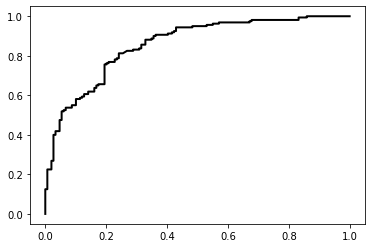

Random Data Processing for horizon =  5
Random data AUC =  0.6202181208053692


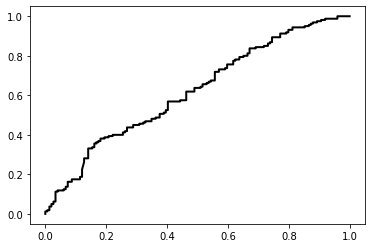

C =  0.1
Real_data_accuracy   :  0.5243
Random data_accuracy :  0.4822
Gain =  0.0421
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.8780712788259959


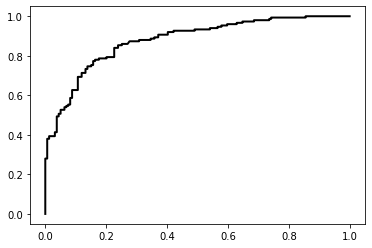

Random Data Processing for horizon =  10
Random data AUC =  0.6948008385744233


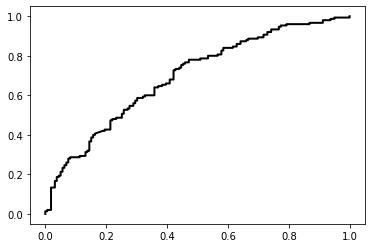

C =  0.1
Real_data_accuracy   :  0.7087
Random data_accuracy :  0.5146
Gain =  0.1941
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9001604187774401


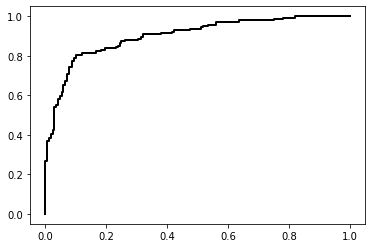

Random Data Processing for horizon =  20
Random data AUC =  0.7355623100303952


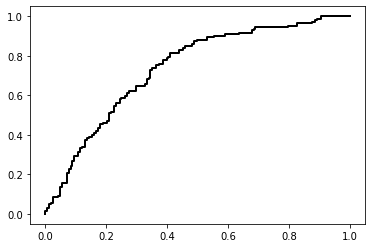

C =  0.1
Real_data_accuracy   :  0.835
Random data_accuracy :  0.5437
Gain =  0.2913
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9436241610738255


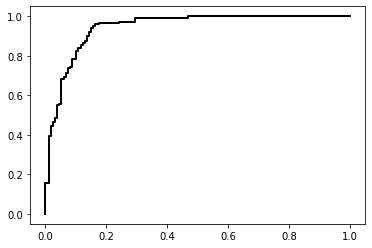

Random Data Processing for horizon =  40
Random data AUC =  0.7545721476510068


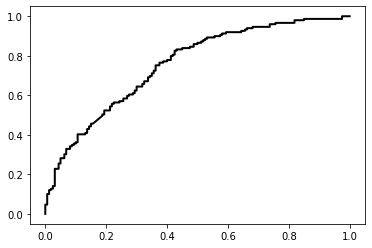

C =  0.1
Real_data_accuracy   :  0.8641
Random data_accuracy :  0.5178
Gain =  0.3463
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9418693009118542


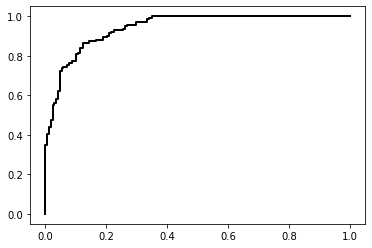

Random Data Processing for horizon =  60
Random data AUC =  0.7825059101654847


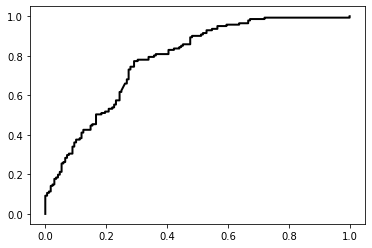

C =  0.1
Real_data_accuracy   :  0.8479
Random data_accuracy :  0.5437
Gain =  0.3042
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9657350523492255


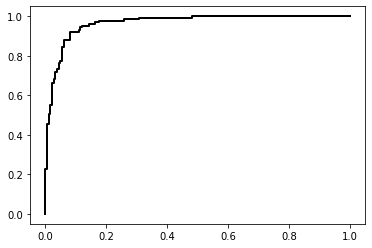

Random Data Processing for horizon =  120
Random data AUC =  0.7978930518300597


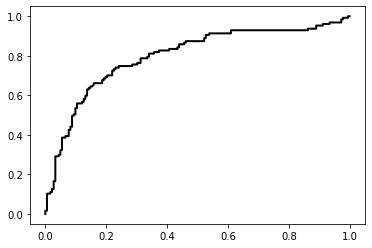

C =  0.1
Real_data_accuracy   :  0.8576
Random data_accuracy :  0.589
Gain =  0.2686
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9967030068577457


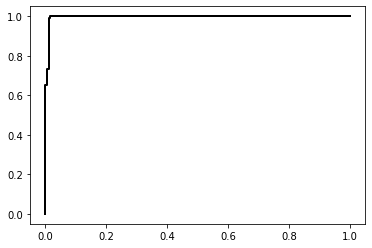

Random Data Processing for horizon =  250
Random data AUC =  0.8315895902936521


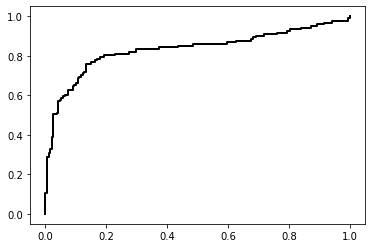

C =  0.1
Real_data_accuracy   :  0.9159
Random data_accuracy :  0.6084
Gain =  0.3075
---------------------------------------------

Wall time: 24min 24s


In [10]:
%%time
#df_data = pd.aDataFrame
#df_data = df[dummy]

all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"

        #df_data[[r_col, v_col, y_col]] = df[[r_col, v_col, y_col]]
        
        X = df.drop([y_col,p_col,v_col, "date","month","week"], axis = 1)
        y = df[y_col]
        
        r_X = r_df.drop([y_col,p_col,v_col,"date","month","week"], axis = 1)
        r_y = r_df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        r_sc = StandardScaler()
        r_sc.fit(r_X_train)
        r_X_train_std = r_sc.transform(X_train)
        r_X_test_std = r_sc.transform(X_test)
        
        print("Real Data Processing for horizon = ",j)
        
        maxval = -10000.0
        c = 0.0
        sval = 0.0
        
        for cval in {0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,}:
            
            #print("<  {}  >".format(cval))
         
            clf = svm.SVC(kernel='rbf', C=cval, probability=True)
                        
            scores = cross_val_score(clf, X_train_std, y_train, cv=3)
            ascores = scores.mean()
            
            r_scores = cross_val_score(clf, r_X_train_std, r_y_train, cv=3)
            r_ascores = scores.mean()
            
            
            #print(ascores)
            #print(r_ascores)
            
            real_random = ascores - r_ascores
            
            sval = sval + real_random
            
            if maxval < real_random:
                
                maxval = real_random
                c = cval
                
            #print(cval, (real_random))
            
        #print (c,maxval, (sval/10.0))
        clf = svm.SVC(kernel='rbf', C=c, probability=True)
        clf.fit(X_train_std,y_train)
        lw=2            
        
        predictions = clf.predict(X_test_std)
        probs = clf.predict_proba(X_test_std)        
        
        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        print("Random Data Processing for horizon = ",j)
        
        clf.fit(r_X_train_std,r_y_train)
        r_predictions = clf.predict(r_X_test_std)
        r_probs = clf.predict_proba(r_X_test_std)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(r_y_test, r_probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("Random data AUC = ",roc_auc)
        plt.plot(fpr, tpr, lw=lw, color='black')
        plt.show()

        print ("C = ",c)
        real_accuracy = round(metrics.accuracy_score(y_test, predictions),4)
        random_accuracy = round(metrics.accuracy_score(r_y_test, r_predictions),4)
        
        print("Real_data_accuracy   : ", real_accuracy)
        print("Random data_accuracy : ", random_accuracy)
                
        gain = (real_accuracy - metrics.accuracy_score(r_y_test,r_predictions))
        
        print ("Gain = ",round(gain,4))
        print ("---------------------------------------------\n")
        
        v_real_accuracy = str(j) + "_real_accuracy"
        v_random_accuracy = str(j) + "_random_accuracy"
        v_gain = str(j) +"_gain"
        
        sub_result[v_real_accuracy] = real_accuracy 
        sub_result[v_random_accuracy] = random_accuracy
        sub_result[v_gain] = gain
        
    all_result[i] = sub_result
    
    #print(all_result)

In [12]:
final_results = pd.DataFrame(all_result)

In [18]:
final_results

,SPY,IWM,EEM,TLT,LQD,TIP,IYR,GLD,FXE
1_real_accuracy,0.601900,0.543700,0.469300,5.178000e-01,0.530700,0.569600,0.627800,0.485400,0.466000
1_random_accuracy,0.576100,0.530700,0.462800,5.178000e-01,0.530700,0.504900,0.569600,0.485400,0.466000
1_gain,0.025848,0.012956,0.006517,6.472492e-07,-0.000044,0.064746,0.058221,-0.000037,-0.000019
3_real_accuracy,0.721700,0.708700,0.712000,7.379000e-01,0.650500,0.715200,0.601900,0.511300,0.498400
3_random_accuracy,0.618100,0.569600,0.462800,5.081000e-01,0.543700,0.498400,0.589000,0.488700,0.482200
3_gain,0.103577,0.139121,0.249217,2.298094e-01,0.106811,0.216818,0.012903,0.022627,0.016199
5_real_accuracy,0.737900,0.731400,0.760500,7.476000e-01,0.741100,0.799400,0.679600,0.728200,0.524300
5_random_accuracy,0.605200,0.556600,0.488700,4.951000e-01,0.569600,0.491900,0.592200,0.508100,0.482200
5_gain,0.132722,0.174766,0.271827,2.524544e-01,0.171521,0.307491,0.087367,0.220109,0.042099
10_real_accuracy,0.786400,0.750800,0.789600,7.961000e-01,0.792900,0.805800,0.708700,0.712000,0.708700


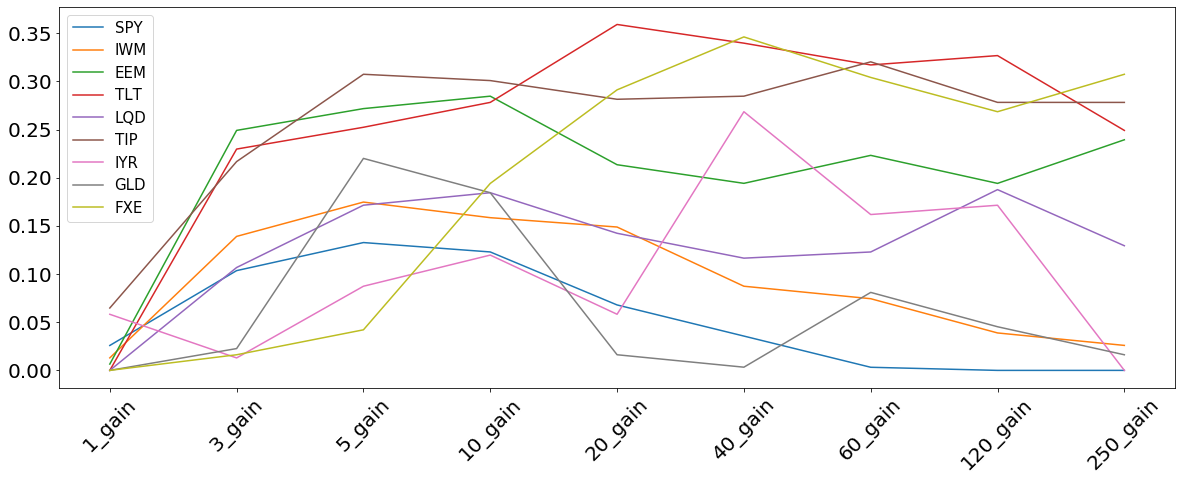

In [41]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('gain')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()

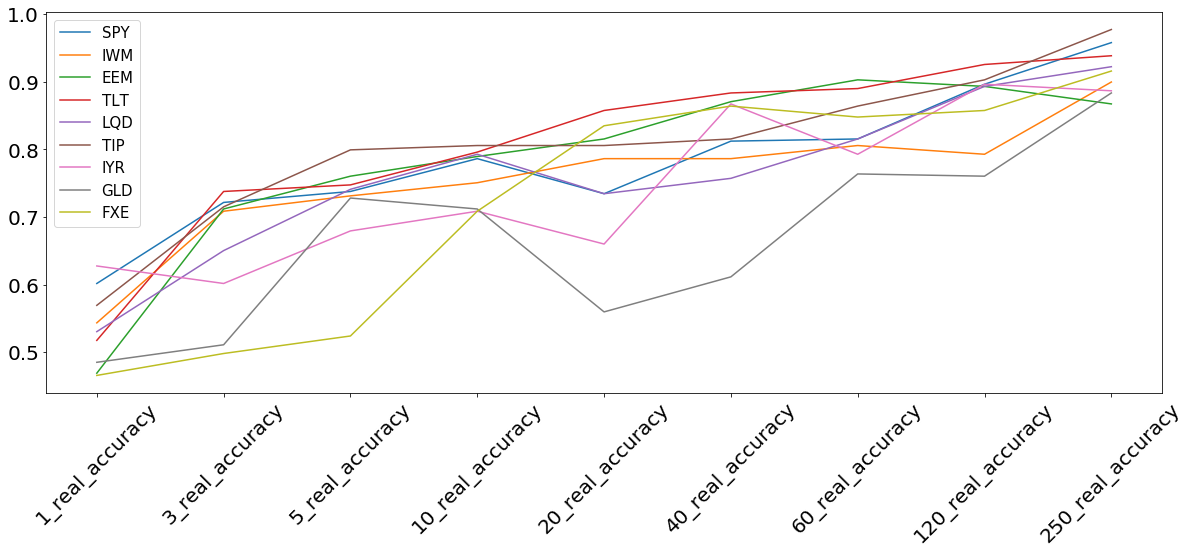

In [42]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('real_accuracy')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()